In [ ]:
!pip install -q xlrd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('sdsp_patients.xlsx')
df

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Every Day,No Difference,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Every Day,Evenings,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Every Day,No Difference,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,Every Day,Evenings,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Every Day,Evenings,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,0,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Disease_1,Female,36.0,142,144.0,24.0,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,3-4 Days a Week,No Difference,No,Yes,No,Yes,No,NaN,NaN,No,No,No,No,Yes,No,No,8,Yes,No,No,No,No,No
396,Disease_1,Male,60.0,172,165.0,120.0,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Every Day,Evenings,Yes,Yes,NaN,Yes,Yes,Yes,NaN,No,No,No,No,No,No,No,9,Yes,No,No,No,No,No
397,Disease_1,Female,41.0,147,156.0,60.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,3-4 Days a Week,Evenings,Yes,Yes,Yes,Yes,No,No,NaN,No,No,No,No,No,No,No,9,Yes,Yes,Yes,No,No,No
398,Disease_1,Male,37.0,138,144.0,120.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,3-4 Days a Week,Evenings,Yes,Yes,Yes,Yes,No,Yes,NaN,No,No,No,No,No,No,No,9,Yes,No,No,No,No,No


In [ ]:
df.shape


(400, 51)

In [ ]:
df.isnull().sum() #This part shows us if that column have a empty value, but it does not show the whitespaces.

Disease         0
Feature_1       0
Feature_2       0
Feature_3       0
Feature_4       0
Feature_5       0
Feature_6       0
Feature_7       0
Feature_8       0
Feature_9       0
Feature_10      0
Feature_11      0
Feature_12      0
Feature_13      0
Feature_14      0
Feature_15      0
Feature_16      0
Feature_17      0
Feature_18      0
Feature_19      0
Feature_20      0
Feature_21      0
Feature_22      0
Feature_23      0
Feature_24      0
Feature_25      0
Feature_26      0
Feature_27      0
Feature_28      1
Feature_29      0
Feature_30      0
Feature_31      0
Feature_32     16
Feature_33     12
Feature_34      0
Feature_35     43
Feature_36    259
Feature_37      0
Feature_38      0
Feature_39      0
Feature_40      0
Feature_41      0
Feature_42      0
Feature_43      0
Feature_44      0
Feature_45      0
Feature_46      0
Feature_47      0
Feature_48      0
Feature_49      0
Feature_50      0
dtype: int64

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True) # With this code, we replace whitespaces with empty. And now we can delete columns with 'dropna' .
df = df.dropna(axis='columns')
df

,Disease,Feature_1,Feature_2,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_29,Feature_30,Feature_31,Feature_34,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46
0,Disease_1,Male,28.0,96.0,2.0,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Difference,No,Yes,No,No,No,No,No,No,No,No,0,No,No
1,Disease_1,Male,18.0,46.0,3.0,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Evenings,Yes,Yes,No,No,No,No,No,No,Yes,No,0,No,No
2,Disease_1,Male,44.0,150.0,1.0,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Difference,No,Yes,No,Yes,No,No,No,Yes,No,No,0,No,No
3,Disease_1,Male,19.0,66.0,18.0,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,Evenings,Yes,No,No,No,No,No,No,No,Yes,No,0,No,No
4,Disease_1,Male,17.5,54.0,3.0,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Evenings,Yes,Yes,No,No,No,No,No,No,No,No,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Disease_1,Female,36.0,144.0,24.0,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Difference,No,Yes,No,No,No,No,No,Yes,No,No,8,Yes,No
396,Disease_1,Male,60.0,165.0,120.0,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Evenings,Yes,Yes,Yes,No,No,No,No,No,No,No,9,Yes,No
397,Disease_1,Female,41.0,156.0,60.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Evenings,Yes,Yes,No,No,No,No,No,No,No,No,9,Yes,Yes
398,Disease_1,Male,37.0,144.0,120.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Evenings,Yes,Yes,No,No,No,No,No,No,No,No,9,Yes,No


In [ ]:
genders = {   # Genders has change to binaric numbers Female = 0, Male = 1
    "Female" : 0,
    "Male": 1
}
df["Feature_1"] = df["Feature_1"].map(genders)


times = {    # Times has change to numbers. No Difference = 0, Mornings = 1, Evenings = 2
    "No Difference" : 0,
    "Mornings": 1,
    "Evenings":2
}
df["Feature_29"] = df["Feature_29"].map(times)


diseases = {    # Diseases has change to numbers. Disease_1 = 1, Disease_2 = 1, Disease_3 = 3, Disease_4 = 4
    "Disease_1":1,
    "Disease_2":2,
    "Disease_3":3,
    "Disease_4":4
}
df['Disease'] = df['Disease'].map(diseases)


In [ ]:
df.replace(('Yes', 'No'), (1, 0), inplace=True) # We have so many Yes and No in data. We have to represent them with numbers. Yes = 1 and No = 0

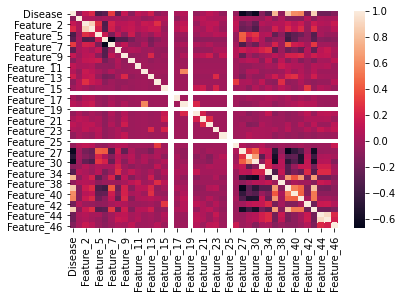

In [ ]:
corr = df.corr()
sns.heatmap(corr)

We see some horizontal and vertical white lines in our correlation map. If we look at the table, we see that those columns filled with same answers. So they will not affect to find disease. (Feature16, Feature19 and Feature 25)

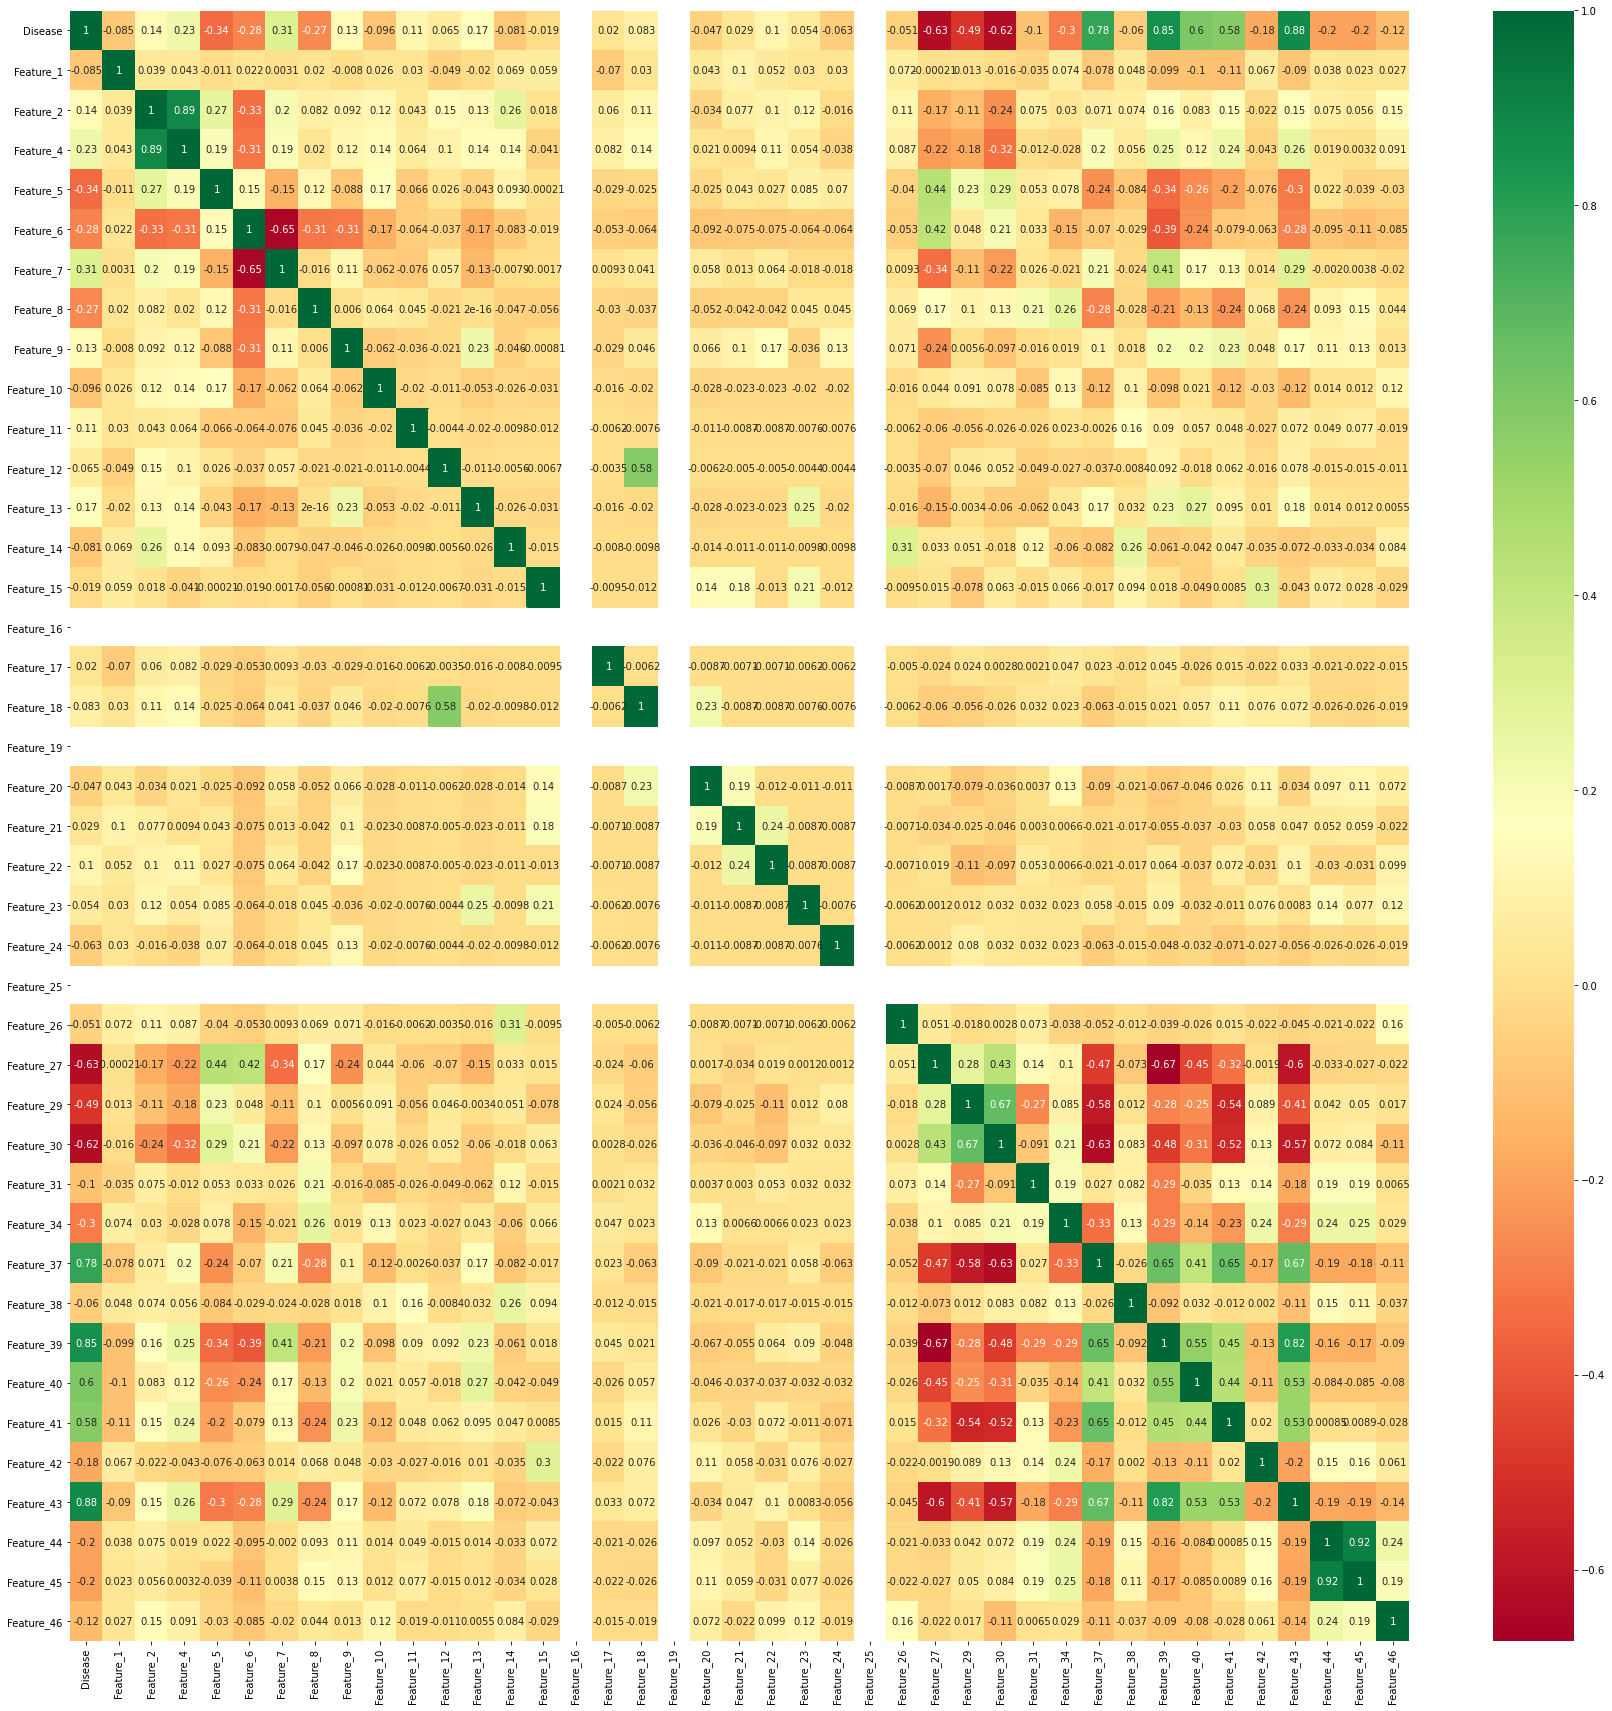

In [ ]:
top_corr_features = corr.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We dont have a high correlation ( higher than 0.9 ) between disease and features. Of course this is a decision, we can delete some features which have high correlations like Feature_43 ( correlation = 0.88 ). 

In [ ]:
df = df.drop(columns=['Feature_16', 'Feature_19','Feature_25'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Disease', axis=1), df['Disease'], test_size=0.20)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

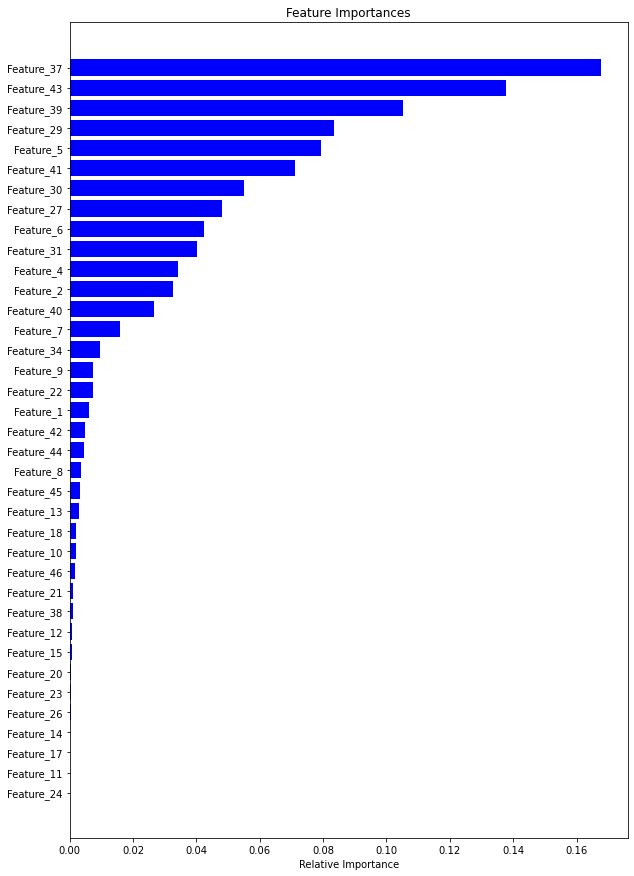

In [ ]:
features = df.drop('Disease', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This is also very useful for feature selection. We can see feature importances for our model and we will delete some features according to this table.

In [ ]:
#If you want to change model features, add it in the Selected_Features array

Selected_Features = ['Disease','Feature_37' ,'Feature_43', 'Feature_39', 'Feature_29']
new_df = df[Selected_Features]


In [ ]:
new_df.columns

Index(['Disease', 'Feature_37', 'Feature_43', 'Feature_39', 'Feature_29'], dtype='object')

In [ ]:
new_df.shape

(400, 5)

In [ ]:
#We train our model again with rest of features
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Disease', axis=1), new_df['Disease'], test_size=0.20, random_state=0)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(X_test,y_test)

0.975

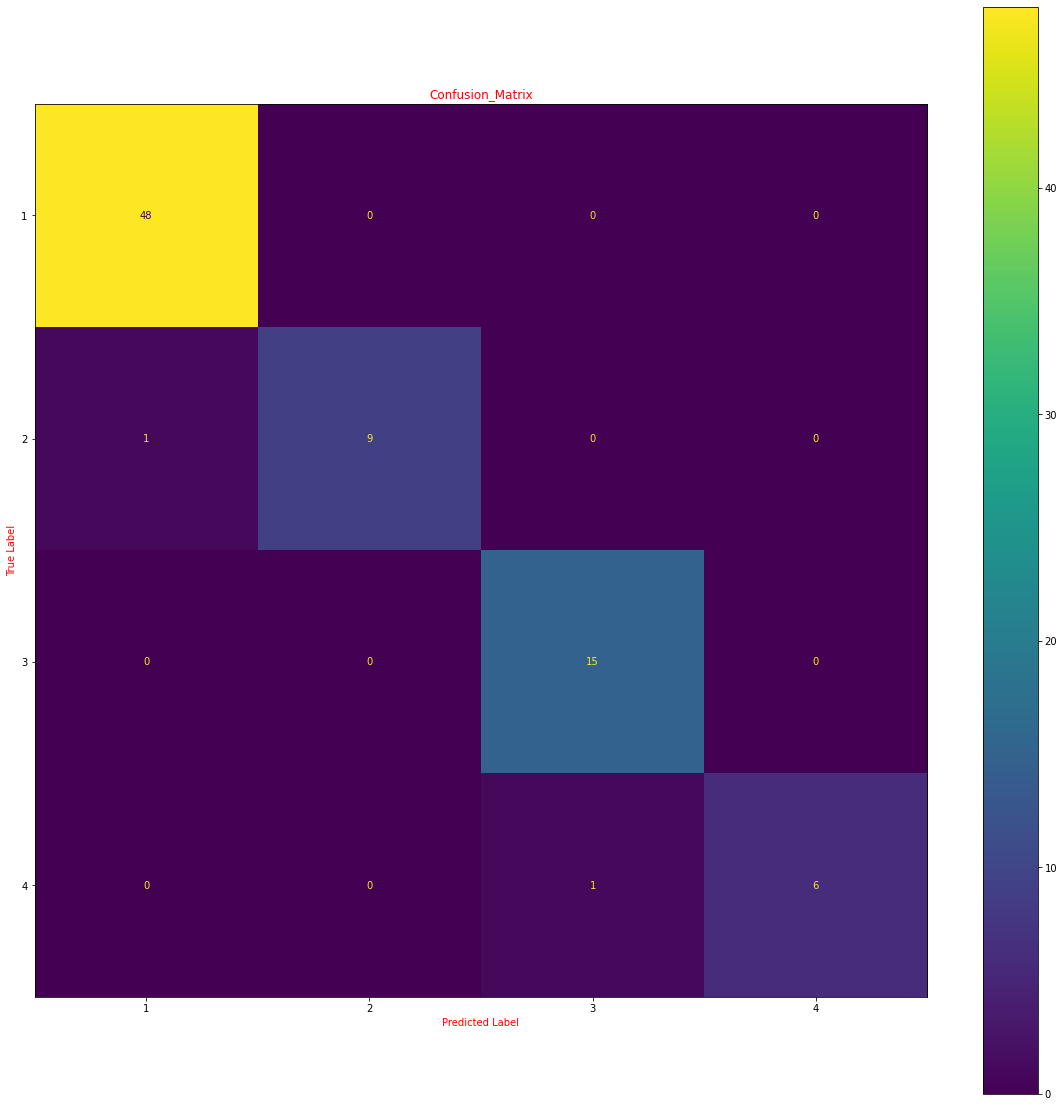

In [ ]:
#We have very good score and lets see that on confusion matrix.

matrix = plot_confusion_matrix(model,X_test,y_test)
matrix.ax_.set_title('Confusion_Matrix',color = 'red')
plt.xlabel('Predicted Label',color = 'red')
plt.ylabel('True Label',color = 'red')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')
plt.gcf().set_size_inches(20,20)
plt.show()

In [ ]:
dict = {'model' : model, 'features' : Selected_Features}

In [ ]:

from sklearn.externals import joblib

joblib.dump(dict, 'model.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.joblib']